In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_or = pd.read_csv('twitter_new.csv', encoding='latin-1')
new_header = ['target', 'ids', 'date', 'flag', 'user', 'text']
first_row = df_or.columns.tolist()
df_or.columns = new_header
df_or = pd.concat([pd.DataFrame([first_row], columns=new_header), df_or], ignore_index=True)
df_or['target'] = df_or['target'].astype('int64')
df_or['ids'] = df_or['ids'].astype('int64')

df_or

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df_or.shape

(1600000, 6)

In [5]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df_or.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [7]:
print(df_or.target.value_counts())

target
0    800000
4    800000
Name: count, dtype: int64


In [8]:
# Map the Target value
df_or['target'] = df_or['target'].map({0: 0, 4: 1})

In [9]:
# We need Target and Text Data alone
df = df_or[['target', 'text']]
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
#Separating Positive and Negative 
df_pos = df[df['target'] == 1]
df_neg = df[df['target'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


In [11]:
# Only retaining 1/2 of our data from each output group. We can't run 1.6 million data
df_pos = df_pos.iloc[:int(len(df_pos)/2)]
df_neg = df_neg.iloc[:int(len(df_neg)/2)]
print(len(df_pos), len(df_neg))

400000 400000


In [12]:
# Joining the DF's
df = pd.concat([df_neg,df_pos])
len(df)

800000

In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.target.value_counts()

target
0    400000
1    400000
Name: count, dtype: int64

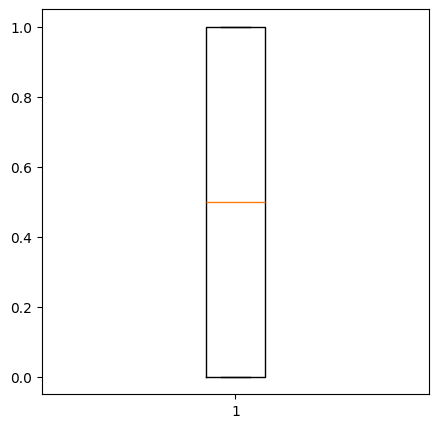

In [15]:
# Box Plot to view the Distribution of Target Values
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.target)
plt.show()

In [16]:
# Length of Each Tweets
df['pre_clean_len'] = [len(t) for t in df.text]
df['pre_clean_len']

0          115
1          111
2           89
3           47
4          111
          ... 
1199995     77
1199996     94
1199997     80
1199998     17
1199999     58
Name: pre_clean_len, Length: 800000, dtype: int64

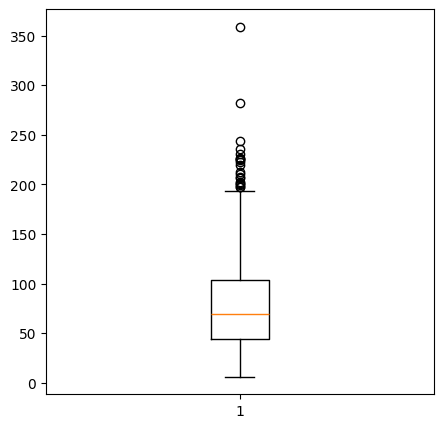

In [17]:
# Outliers Range
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [18]:
df[df.pre_clean_len > 140]

,target,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
...,...,...,...
1199687,1,@mrsvc_sp and ALL: http://www.battle.oxoniensi...,147
1199768,1,&gt;&gt;&gt;T.G.I.Fridays..hve to go wit this ...,146
1199815,1,Aldi's reusable grocery bags = strong enough 2...,141
1199925,1,@mlwebb &quot;Is that digger&quot;. Who is Dig...,148


In [19]:
df.drop(['pre_clean_len'], axis = 1, inplace = True)

In [20]:
df.head(50)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [21]:
# Cleaning Process of text
import re
def process_tweet(tweet):
    tweet = tweet.lower()   #lowercase str
    tweet = tweet.lstrip('\ufeff')   #removing UTF-8 BOM
    tweet = re.sub('@[^\s]+', '', tweet)   #removes username
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   #removes URLs
    tweet = re.sub(r"\d+", " ", str(tweet))   #removes digits
    tweet = re.sub('&quot;'," ", tweet)   #removes quot
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))   #removes single characters
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))   #removes punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)   #converts repetion of 2letters
    tweet = re.sub(r"\s+", " ", str(tweet))   #Double spaces to single space
    return tweet

In [22]:
df['processed_tweets'] = df['text'].apply(process_tweet)
df = df[['target', 'processed_tweets', 'text']]
df

,target,processed_tweets,text
0,0,aww that bummer you shoulda got david carr of...,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can update his facebook by te...,is upset that he can't update his Facebook by ...
2,0,dived many times for the ball managed to save...,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,no it not behaving at all mad why am here bec...,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1199995,1,doin the same so well definately gettup this ...,@misstinayao...im doin the same...so well defi...
1199996,1,finding life simple delights in the midst of h...,Finding life's simple delights in the midst of...
1199997,1,just tell me when your on your way ll keep ch...,@McLovin143 just tell me when your on your wa...
1199998,1,goodbye downtown,goodbye downtown


In [23]:
df['processed_tweets'] = df['processed_tweets'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package punkt to C:\Users\Vignesh
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vignesh
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# to remove stop words
def remove_stwords(text):
    tweets_tokenized = word_tokenize(text)
    tweets_new = " ".join([i for i in tweets_tokenized if i not in stop_words])
    return tweets_new

df['processed_tweets'] = [remove_stwords(r) for r in df['processed_tweets']]

In [26]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Vignesh
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Vignesh
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vignesh Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [27]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Make sure you have downloaded WordNet
nltk.download('wordnet')

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# nltk tag to wordnet tag
def nltk_tag_to_wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wn_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))  # Use lemmatize method
    return " ".join(lemmatized_sentence)

# Example usage
df['processed_tweets'] = df['processed_tweets'].apply(lambda x: lemmatize_sentence(x))


[nltk_data] Downloading package wordnet to C:\Users\Vignesh
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
df

,target,processed_tweets,text
0,0,aww bummer shoulda get david carr third day,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,upset update facebook texting might cry result...,is upset that he can't update his Facebook by ...
2,0,dive many time ball manage save rest bound,@Kenichan I dived many times for the ball. Man...
3,0,whole body feel itchy like fire,my whole body feels itchy and like its on fire
4,0,behave mad see,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1199995,1,doin well definately gettup week aiight,@misstinayao...im doin the same...so well defi...
1199996,1,find life simple delight midst heal brain change,Finding life's simple delights in the midst of...
1199997,1,tell way keep checking twitter,@McLovin143 just tell me when your on your wa...
1199998,1,goodbye downtown,goodbye downtown


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

In [30]:
all_words_df = df.loc[df['target'] == 1, :]

all_words = ' '.join([text for text in all_words_df['processed_tweets']])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df


,word,count
0,love,27405
1,guy,5405
2,best,5690
3,meet,2757
4,one,13996
...,...,...
103579,wolpert,1
103580,sailin,1
103581,ìª½,1
103582,hallucinations,1


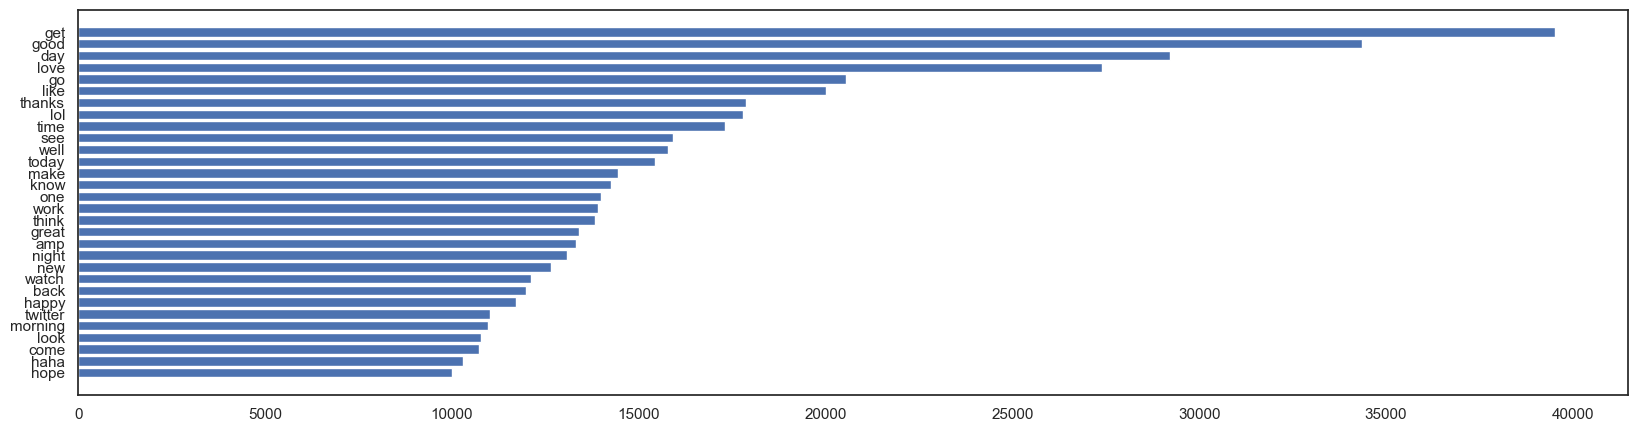

In [31]:
words_df = words_df.nlargest(columns="count", n = 30)

words_df.sort_values('count', inplace = True)

plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

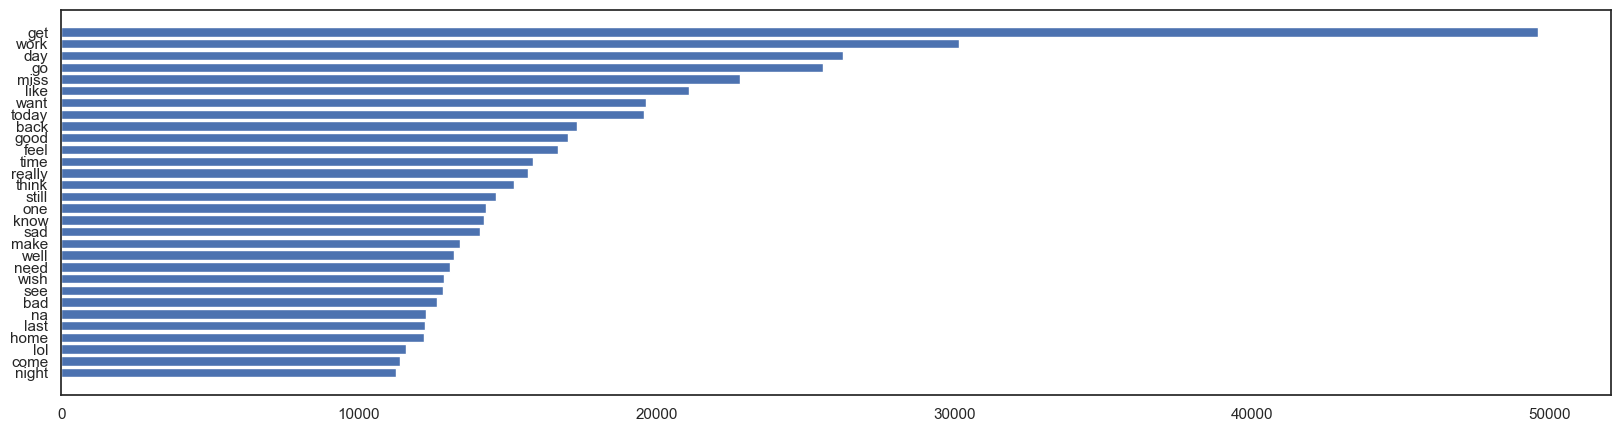

In [32]:
sns.set(style = 'white')
from nltk import FreqDist

all_words_df = df.loc[df['target'] == 0, :]

all_words = ' '.join([text for text in all_words_df['processed_tweets']])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

words_df = words_df.nlargest(columns='count', n = 30)

words_df.sort_values('count', inplace = True)

plt.figure(figsize = (20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df['processed_tweets'])  
final_vectorized_data

<800000x2078576 sparse matrix of type '<class 'numpy.int64'>'
	with 9593266 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data,
                                df['target'],test_size=0.2, random_state=69) 
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (640000, 2078576)
X_test_shape :  (160000, 2078576)
y_train_shape :  (640000,)
y_test_shape :  (160000,)


In [35]:
from sklearn.linear_model import LogisticRegression #importing the model
logistic_regression= LogisticRegression(solver = "lbfgs",max_iter=200000) #initialise the required package
logistic_regression.fit(X_train,y_train) #Fitting the model
y_pred=logistic_regression.predict(X_test)

#logistic_regression.coef_
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
logistic_regression.score(X_test,y_test)

0.781625

In [37]:
from sklearn.metrics import roc_auc_score
log = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])
print("The AUROC Score of Logistic Regression model",log)

The AUROC Score of Logistic Regression model 0.8568814980827654


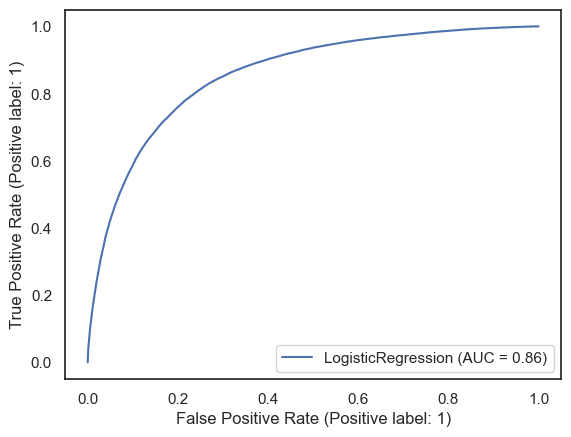

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report, roc_curve
     

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)

In [39]:
accuracy_score(y_test,y_pred)

0.781625

In [40]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[60822 19456]
 [15484 64238]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     80278
           1       0.77      0.81      0.79     79722

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



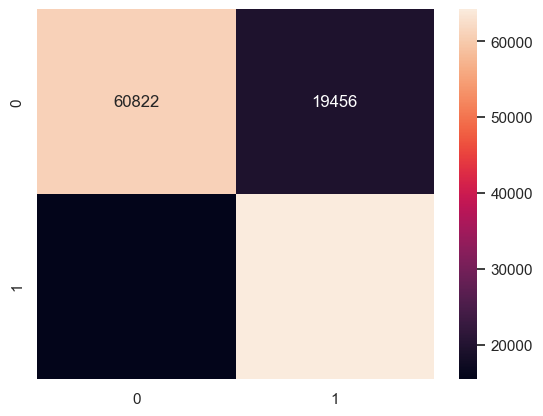

In [41]:
cm = confusion_matrix(y_test,y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 8, max_features='sqrt')
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

In [43]:
rf_y_pred = rf.predict(X_test)
rf_y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [44]:
from sklearn.metrics import roc_auc_score
rf_log = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("AUROC Score of Random Forest classifier model",rf_log)

AUROC Score of Random Forest classifier model 0.7402425628759733


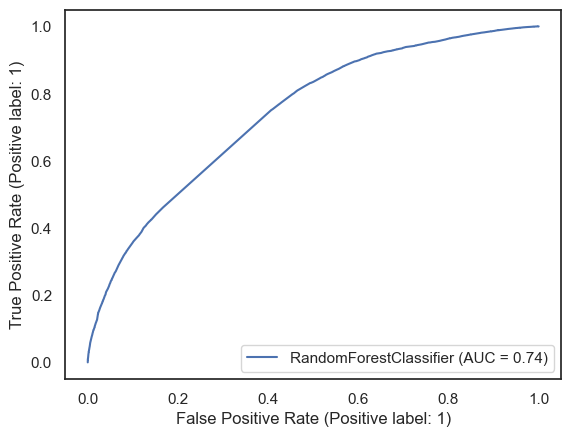

In [45]:
RocCurveDisplay.from_estimator(rf, X_test, y_test) #plotting ROC

In [46]:
print(confusion_matrix(y_test,rf_y_pred))
print(classification_report(y_test,rf_y_pred))

[[40848 39430]
 [13575 66147]]
              precision    recall  f1-score   support

           0       0.75      0.51      0.61     80278
           1       0.63      0.83      0.71     79722

    accuracy                           0.67    160000
   macro avg       0.69      0.67      0.66    160000
weighted avg       0.69      0.67      0.66    160000



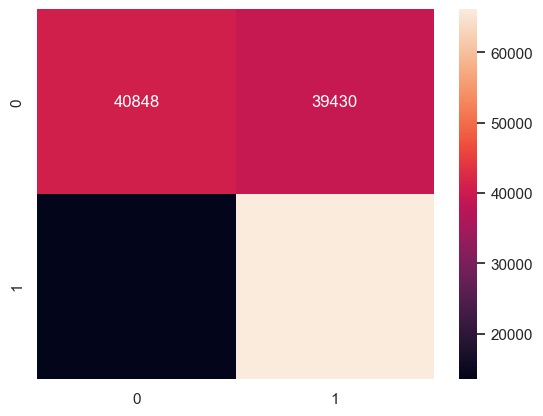

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

NOTE:
-> Higher the AUROC Score the model is best.

CONCLUSION:
-> Positive Tweets == Negative Tweets
-> So comparing the developed models Logistic Regression and Random Forest Algorithm, where Logistic Regression Model has given the AUROC Score higher than the Random Forest.
-> Therefore Logistic Regression performs well than the Random Forest.